<a href="https://colab.research.google.com/github/T-Schwab/QM2/blob/main/Dam_Barriers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import geopandas as gpd


In [17]:
# Read the shapefile
gdf = gpd.read_file("/GDW_barriers_v1_0.shp")

# Print the first few rows of the GeoDataFrame
print(gdf.head())

   GDW_ID         RES_NAME             DAM_NAME        ALT_NAME  \
0       1    Lake Winnipeg               Jenpeg      Split Lake   
1       2          Ontario             Iroquois            None   
2       3           Baikal              Irkutsk            None   
3       4    Lake Victoria           Owen Falls            None   
4       5  Southern Indian  Missi Falls Control  Notigi Control   

           DAM_TYPE LAKE_CTRL         RIVER ALT_RIVER MAIN_BASIN  \
0  Lake Control Dam       Yes        Nelson      None       None   
1  Lake Control Dam       Yes  St. Lawrence      None       None   
2  Lake Control Dam       Yes        Angara      None       None   
3  Lake Control Dam       Yes    White Nile      None       Nile   
4  Lake Control Dam       Yes     Churchill       Rat       None   

       SUB_BASIN  ... LONG_DAM LAT_DAM ORIG_SRC POLY_SRC GRAND_ID  HYRIV_ID  \
0           None  ...      0.0     0.0    GRanD   CanVec      709  70125969   
1           None  ...      0.0

<Axes: >

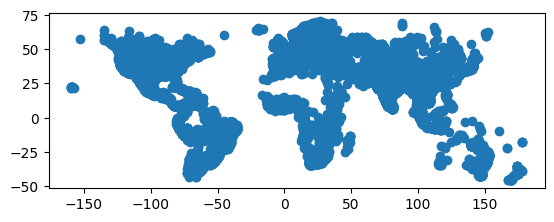

In [18]:
gdf.plot()

In [22]:
import pandas as pd

df = pd.DataFrame(gdf)

# List of African countries
african_countries = [
    "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi",
    "Cameroon", "Central African Republic", "Republic of the Congo",
    "Democratic Republic of the Congo", "Egypt",
    "Eritrea", "Ethiopia", "Gabon", "Ghana", "Guinea", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali",
    "Mauritania", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda",
   "Senegal", "Sierra Leone", "Somalia", "South Africa",
   "Sudan", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe", "Swaziland"
]

# Filter the DataFrame to only include African countries
df_africa = df[df['COUNTRY'].isin(african_countries)]

# Display the filtered DataFrame
print(df_africa)

       GDW_ID       RES_NAME            DAM_NAME             ALT_NAME  \
3           4  Lake Victoria          Owen Falls                 None   
58         59    Lake Nasser      High Aswan Dam                 None   
59         60         Kainji              Kainji                 None   
60         61          Volta   Akosombo Main Dam  Akosombo Saddle Dam   
61         62   Cahora Bassa        Cahora Bassa         Cabora Bassa   
...       ...            ...                 ...                  ...   
41050   41051           None        Applethwaite                 None   
41051   41052           None                None                 None   
41052   41053           None  Middle Kruisvallei                 None   
41053   41054           None   Lower Kruisvallei                 None   
41054   41055           None                None                 None   

               DAM_TYPE LAKE_CTRL       RIVER ALT_RIVER            MAIN_BASIN  \
3      Lake Control Dam       Yes  White N

In [20]:
# Strip any leading or trailing spaces in the 'COUNTRY' column
df['COUNTRY'] = df['COUNTRY'].str.strip()

# If necessary, convert both 'COUNTRY' column and african_countries list to lowercase
df['COUNTRY'] = df['COUNTRY'].str.lower()
african_countries = [country.lower() for country in african_countries]

# Filter the DataFrame to only include African countries
df_africa = df[df['COUNTRY'].isin(african_countries)]

# Verify the result
print(df_africa.head())

    GDW_ID       RES_NAME           DAM_NAME             ALT_NAME  \
3        4  Lake Victoria         Owen Falls                 None   
58      59    Lake Nasser     High Aswan Dam                 None   
59      60         Kainji             Kainji                 None   
60      61          Volta  Akosombo Main Dam  Akosombo Saddle Dam   
61      62   Cahora Bassa       Cahora Bassa         Cabora Bassa   

            DAM_TYPE LAKE_CTRL       RIVER ALT_RIVER MAIN_BASIN  \
3   Lake Control Dam       Yes  White Nile      None       Nile   
58               Dam      None        Nile      None       Nile   
59               Dam      None       Niger      None      Niger   
60               Dam      None       Volta      None      Volta   
61               Dam      None     Zambezi      None    Zambezi   

        SUB_BASIN  ... LONG_DAM LAT_DAM ORIG_SRC POLY_SRC GRAND_ID  HYRIV_ID  \
3   Victoria Nile  ...      0.0     0.0    GRanD     SWBD     4492  10980811   
58           None  ...

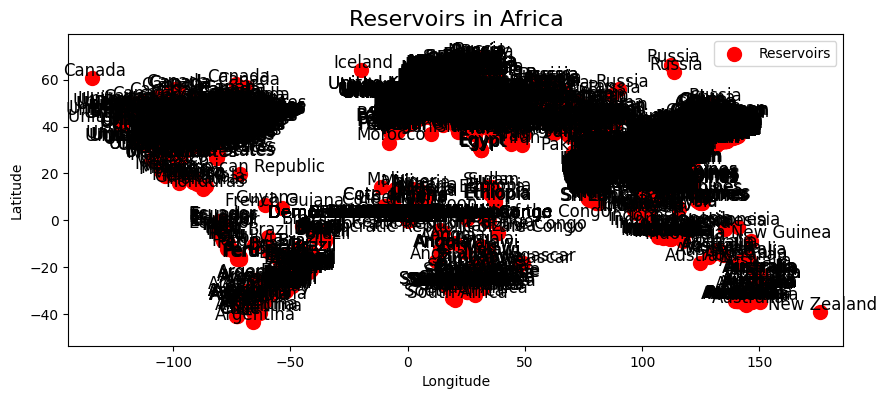

In [23]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Assuming 'df_africa' is a DataFrame containing only African countries (filtered from your main df)
# Ensure the 'LAT_DAM' and 'LONG_DAM' are in the correct coordinate system (EPSG:4326)
df_selected = df[['LAT_DAM', 'LONG_DAM']]  # Your dam data

# Plot the map of Africa using 'df_africa'
# If 'df_africa' is not a GeoDataFrame, convert it to a GeoDataFrame
# Make sure to convert it to EPSG:4326 to match the lat/lon coordinates
if not isinstance(df_africa, gpd.geodataframe.GeoDataFrame):
    df_africa = gpd.GeoDataFrame(df_africa, geometry=gpd.points_from_xy(df_africa['LONG_DAM'], df_africa['LAT_DAM']))
    df_africa = df_africa.set_crs('EPSG:4326')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the map of Africa using 'df_africa'
df_africa.plot(ax=ax, color='lightgray')

# Plot the reservoirs on the map as scatter points
ax.scatter(df_selected['LONG_DAM'], df_selected['LAT_DAM'], color='red', marker='o', s=100, label="Reservoirs")

# Add labels for each point (country name)
for i, row in df.iterrows():
    ax.text(row['LONG_DAM'] + 1, row['LAT_DAM'] + 1, row['COUNTRY'], fontsize=12, ha='center', color='black')

# Customize the plot
ax.set_title("Reservoirs in Africa", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Optionally, set axis limits based on the min/max values of the data
ax.set_xlim(df_selected['LONG_DAM'].min() - 10, df_selected['LONG_DAM'].max() + 10)
ax.set_ylim(df_selected['LAT_DAM'].min() - 10, df_selected['LAT_DAM'].max() + 10)

# Show the plot
plt.legend()
plt.show()
